<a href="https://colab.research.google.com/github/MatheusFarias15/Machine-Learning-para-Negocios-Digitais/blob/main/Machine_Learning_intro_a_sistema_de_recomenda%C3%A7%C3%A3o_em_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso da alura de Machine Learning: intro a sistema de recomendação em python  


*   https://grouplens.org/datasets/movielens/latest/




In [24]:
import pandas as pd

notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [26]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Adicionando a nota media


In [27]:
notas_media = notas.groupby('filmeId').mean()['nota']
filmes["nota_media"] = notas_media
filmes.sort_values("nota_media" , ascending=False).head(10)


,titulo,generos,nota_media
filmeId,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
100556,"Act of Killing, The (2012)",Documentary,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,5.0
143511,Human (2015),Documentary,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
6201,Lady Jane (1986),Drama|Romance,5.0
102217,Bill Hicks: Revelations (1993),Comedy,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0


# Primeira tentativa de recomendação:


In [28]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

,count
filmeId,
356,329
318,317
296,307
593,279
2571,278


In [29]:
filmes ['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,nota_media,total_de_votos
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [30]:
filmes.sort_values('total_de_votos', ascending=False).head(10)


,titulo,generos,nota_media,total_de_votos
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
110,Braveheart (1995),Action|Drama|War,4.031646,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0


In [31]:
Filmes_assitidos = [1 , 50 , 10 , 20 , 12 , 52]
filmes.loc[Filmes_assitidos]

,titulo,generos,nota_media,total_de_votos
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745,204.0
10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0
20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,2.500000,15.0
12,Dracula: Dead and Loving It (1995),Comedy|Horror,2.421053,19.0
52,Mighty Aphrodite (1995),Comedy|Drama|Romance,3.464286,28.0


In [32]:
# procurando uma query
Recomendacao = filmes.query("generos == 'Comedy|Horror' ").sort_values("total_de_votos" , ascending=False).head(5)
Recomendacao.drop(Filmes_assitidos  , errors= "ignore" ).sort_values('total_de_votos', ascending=False)

,titulo,generos,nota_media,total_de_votos
filmeId,,,,
8874,Shaun of the Dead (2004),Comedy|Horror,4.006494,77.0
2699,Arachnophobia (1990),Comedy|Horror,2.811321,53.0
3785,Scary Movie (2000),Comedy|Horror,2.920000,50.0
2003,Gremlins (1984),Comedy|Horror,3.378049,41.0
6888,Scary Movie 3 (2003),Comedy|Horror,2.275000,20.0


In [33]:
# Fazendo uma segunda recomendação
Recomendacao2 = filmes.query("generos == 'Horror' ").sort_values("nota_media" , ascending=False).head(5)
Recomendacao2.drop(Filmes_assitidos  , errors= "ignore" ).sort_values('nota_media', ascending=False)

,titulo,generos,nota_media,total_de_votos
filmeId,,,,
3939,Slumber Party Massacre II (1987),Horror,5.0,1.0
3942,Sorority House Massacre II (1990),Horror,5.0,1.0
3940,Slumber Party Massacre III (1990),Horror,5.0,1.0
1349,Vampire in Venice (Nosferatu a Venezia) (Nosfe...,Horror,5.0,1.0
3941,Sorority House Massacre (1986),Horror,5.0,1.0


# Procurando usuarios similares


<ipython-input-11-1c248b4296f1>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("João", "Maria")


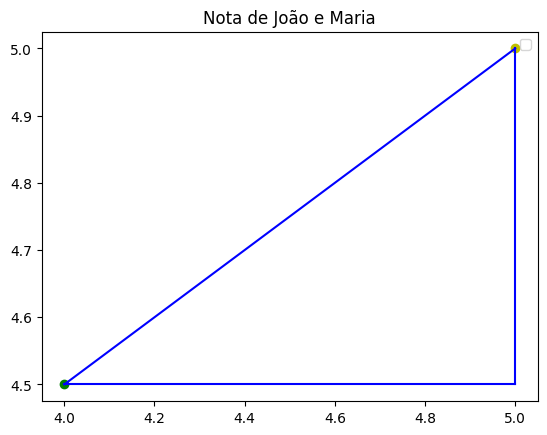

In [11]:
import matplotlib.pyplot as plt
plt.plot(4 , 4.5, "go")
plt.plot(5, 5 , "yo")
plt.legend("João", "Maria")
plt.title("Nota de João e Maria")

plt.plot([4, 5], [4.5, 4.5], color = "b" , linestyle="-")
plt.plot([4, 5], [4.5, 5], color = "b",  linestyle="-")
plt.plot([5, 5], [4.5, 5],  color = "b" , linestyle="-")
plt.show()
# Ideia simples de como um ML pode funcionar calculando a nota e gostos parecidos para filmes entre usuarios

In [13]:
import numpy as np

joao = np.array([4, 4.5 ])
maria = np.array([5 , 5])

joao - maria

array([-1. , -0.5])

In [14]:
from math import sqrt

def pitagoras (a,b):
  (delta_x , delta_y) = a - b
  return sqrt (delta_x * delta_x + delta_y * delta_y)
pitagoras(joao , maria)


1.118033988749895

In [16]:
def pitagoras (a,b):
  return np.linalg.norm(a - b)
pitagoras(joao , maria)
# outra forma de calcular pitagoras

1.118033988749895

<ipython-input-20-52b126073833>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("João", "Maria")


Text(0.5, 1.0, 'Nota de João e Maria')

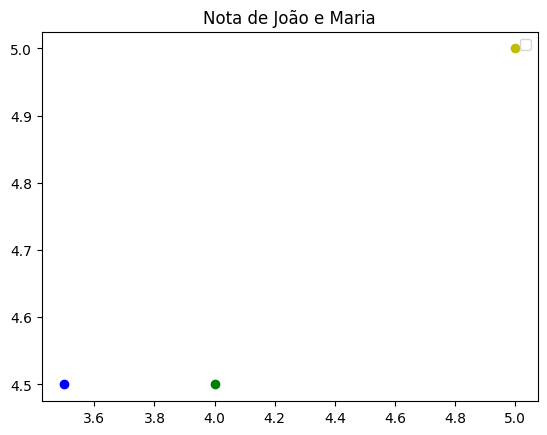

In [20]:
import matplotlib.pyplot as plt
plt.plot(4 , 4.5, "go")
plt.plot(5, 5 , "yo")
plt.plot(3.5 , 4.5 ,"bo")
plt.legend("João", "Maria")
plt.title("Nota de João e Maria")

In [22]:
joaquina = np.array([3.5 , 4.5])

print(pitagoras(joao , maria))
print(pitagoras(joao , joaquina))

1.118033988749895
0.5


In [23]:
def distancia (a,b):
  return np.linalg.norm(a - b)

In [47]:
notas_do_usuario = notas.query("usuarioId ==5")
notas_do_usuario = [("filmeId", "nota")].set_index("filmeId")
notas_do_usuario


         0     1
0  filmeId  nota
